<span style="color: cyan;">

#### ```Portfolio-Assignment-7-1```

This notebook demonstrates how to implement a collaborative filtering model using matrix factorization techniques.

The block of code contains commented-out commands intended for use in Google Colab, a cloud-based Jupyter notebook environment. These commands are used to manage the installation and upgrading of necessary Python libraries. Here's a detailed explanation of each command:

1. `#%pip uninstall -y numpy pandas scipy scikit-learn imbalanced-learn`: This command uninstalls the specified libraries (`numpy`, `pandas`, `scipy`, `scikit-learn`, and `imbalanced-learn`) without prompting for confirmation (`-y` flag). This might be useful if you need to remove existing versions before installing specific versions.

2. `#%pip install numpy pandas scipy scikit-learn imbalanced-learn`: This command installs the specified libraries. These libraries are essential for data manipulation (`numpy`, `pandas`), scientific computing (`scipy`), machine learning (`scikit-learn`), and handling imbalanced datasets (`imbalanced-learn`).

3. `#%pip install seaborn`: This command installs the `seaborn` library, which is used for statistical data visualization.

4. `#%pip install skimpy`: This command installs the `skimpy` library, which is used for quick and easy data exploration.

5. `#%pip install --upgrade numpy scikit-learn`: This command upgrades the `numpy` and `scikit-learn` libraries to their latest versions.

6. `#from google.colab import drive`: This command imports the `drive` module from `google.colab`, which is used to interact with Google Drive.

7. `#drive.mount('/content/drive')`: This command mounts Google Drive to the Colab environment, allowing you to access files stored in your Google Drive account.

These commands are commented out, indicating that they are not currently being executed. They are useful for setting up the environment when running the notebook in Google Colab, ensuring that all required libraries are installed and up-to-date.

In [1]:
#%pip uninstall -y numpy pandas scipy scikit-learn imbalanced-learn
#%pip install numpy pandas scipy scikit-learn imbalanced-learn
#%pip install seaborn
#%pip install skimpy
#%pip install --upgrade numpy scikit-learn
#%pip install imblearn
#%pip install openpyxl
#from google.colab import drive
#drive.mount('/content/drive')

<span style="color: cyan;">

This code imports various libraries and modules that are essential for performing data analysis, preprocessing, and logistic regression modeling in Python. Here's a breakdown of each import and its purpose:

1. `warnings`: This module is used to manage warnings in Python. It allows you to control whether warnings are supressed, displayed, or turned into errors.

2. `pandas as pd`: Pandas is a powerful data manipulation and analysis library. It provides data structures like DataFrames, which are essential for handling and analyzing structured data.

3. `matplotlib.pyplot as plt`: Matplotlib is a plotting library, and `pyplot` is a module within it that provides a MATLAB-like interface for creating static, interactive, and animated visualizations in Python.

4. `seaborn as sns`: Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

5. `skimpy import skim`: Skimpy is a library used for quick and easy data exploration. The `skim` function provides a summary of a DataFrame, similar to the `skimr` package in R.

6. `numpy as np`: NumPy is a fundamental package for scientific computing in Python. It provides support for arrays, matrices, and many mathematical functions.

7. `from sklearn.preprocessing import StandardScaler`: This module from scikit-learn is used for feature scaling. `StandardScaler` standardizes features by removing the mean and scaling to unit variance.

8. `from imblearn.over_sampling import SMOTE`: SMOTE (Synthetic Minority Over-sampling Technique) is used to handle imbalanced datasets by generating synthetic samples for the minority class.

9. `import statsmodels.api as sm`: Statsmodels is a library for estimating and testing statistical models. It provides classes and functions for many statistical models, including linear regression, logistic regression, and time series analysis.

10. `from sklearn.model_selection import train_test_split`: This function from scikit-learn is used to split a dataset into training and testing sets.

11. `from statsmodels.tools.sm_exceptions import ConvergenceWarning`: This import is used to handle convergence warnings that may arise during the fitting of statistical models in statsmodels.

12. `from sklearn.linear_model import LogisticRegression`: This module from scikit-learn provides the `LogisticRegression` class, which is used to perform logistic regression.

13. `from sklearn.metrics import accuracy_score, confusion_matrix`: These functions from scikit-learn are used to evaluate the performance of a classification model. `accuracy_score` calculates the accuracy of the model, and `confusion_matrix` provides a summary of prediction results.

In [ ]:
import warnings  
import pandas                          as pd 
import matplotlib.pyplot               as plt 
import seaborn                         as sns 
from   skimpy                          import skim 
import numpy                           as     np 
from   imblearn.over_sampling          import SMOTE 
from   sklearn.model_selection         import train_test_split 
from   sklearn.linear_model            import LogisticRegression 
from   sklearn.metrics                 import accuracy_score, confusion_matrix 
from   sklearn.preprocessing           import StandardScaler 
import statsmodels.api                 as     sm 
from   statsmodels.tools.sm_exceptions import ConvergenceWarning
np.seterr(divide='ignore', invalid='ignore')
np.seterr(over='ignore', invalid='ignore')
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')

<span style="color: cyan;">

This code performs several key tasks related to data loading and initial exploration using the Pandas library in Python.

First, the code reads data from an Excel file named 'Logit-Data.xlsx' into a DataFrame `df` using the `pd.read_excel` function. This function is highly versatile and can handle various parameters to customize the data reading process, but in this case, it is used with its default settings.

Next, the code adjusts several display options to enhance the readability of the DataFrame when printed. The `pd.set_option` function is used to:
- Display all columns of the DataFrame by setting `display.max_columns` to `None`.
- Set the display width to 1000 characters for better readability by adjusting `display.width`.
- Limit the maximum column width to 50 characters using `display.max_colwidth`, ensuring that long text entries do not overwhelm the display.
- Adjust the maximum number of rows to show to 20 using `display.max_rows`, which helps in managing the output size when printing large DataFrames.

After setting these display options, the code verifies the data by printing the first and last few rows of the DataFrame and generating summary statistics:
- `df.head(5)` prints the first 5 rows of the DataFrame, providing a quick look at the beginning of the dataset.
- `df.tail(5)` prints the last 5 rows of the DataFrame, offering a glimpse of the end of the dataset.
- `df.describe()` generates and prints summary statistics for the numerical columns in the DataFrame, including count, mean, standard deviation, minimum, maximum, and specified percentiles (25th, 50th, and 75th).

These steps are crucial for initial data exploration, allowing you to understand the structure, content, and basic statistics of the dataset before proceeding with further analysis or modeling.

In [3]:
df = pd.read_excel('files/Logit-Data.xlsx')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)       
pd.set_option('display.max_colwidth', 50)   
pd.set_option('display.max_rows', 20)      
df.head(5)

,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,829,4.93,737,28.85,0,0
1,0,228,4.81,707,33.62,0,0
2,0,367,4.51,682,3.51,1,0
3,0,162,4.93,712,33.67,1,0
4,0,103,4.91,667,4.74,0,0


In [4]:
df.tail(5)

,default,installment,log_income,fico_score,rev_balance,inquiries,records
9511,1,345,5.29,672,215.37,2,0
9512,1,258,4.84,722,0.18,5,0
9513,1,98,4.60,687,10.04,8,0
9514,1,352,4.70,692,0.00,5,0
9515,1,853,4.89,732,37.88,6,0


In [5]:
df.describe()

,default,installment,log_income,fico_score,rev_balance,inquiries,records
count,9516.000000,9516.000000,9516.000000,9516.000000,9516.000000,9516.000000,9516.000000
mean,0.159836,320.142077,4.748656,710.841950,16.988948,1.572930,0.062211
std,0.366473,207.066550,0.265017,37.956246,33.721352,2.200329,0.262406
min,0.000000,16.000000,3.280000,612.000000,0.000000,0.000000,0.000000
25%,0.000000,164.000000,4.590000,682.000000,3.270000,0.000000,0.000000
50%,0.000000,269.500000,4.750000,707.000000,8.690000,1.000000,0.000000
75%,0.000000,435.250000,4.900000,737.000000,18.355000,2.000000,0.000000
max,1.000000,940.000000,6.310000,827.000000,1207.360000,33.000000,5.000000


<span style="color: cyan;">

The `skim(df)` function call is used to generate a comprehensive visual summary of the DataFrame `df`. This function is part of the `skimpy` library, which provides an alternative to the traditional `pandas.DataFrame.describe()` method by offering a more detailed and visually appealing overview of the data.

The `skim` function takes a DataFrame as input and produces a summary table that is displayed in the console. This summary includes various statistics and information about each column in the DataFrame, tailored to the specific data types of the columns. For example, it might show the distribution of values, the number of missing values, and other relevant metrics.

The function is designed to handle both Pandas and Polars DataFrames, making it versatile for different data manipulation libraries. However, it does not support DataFrames with multi-column indexes, and it is recommended to ensure that the data types of the columns are correctly set before running the function to get the best results.

By using `skim(df)`, you can quickly gain insights into the structure and content of your dataset, which is particularly useful during the initial stages of data exploration and analysis. This helps in identifying potential issues, such as missing values or incorrect data types, and provides a solid foundation for further data processing and modeling.

In [6]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9516   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column         ┃ NA  ┃ NA %   ┃ mean      ┃ sd       ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ default        │   0 │      0 │    0.1598 │   0.3665 │      0 │      0 │      0 │      0 │     1 │ █    ▂  │  │
│ │ installment    │   0 │      0 │     320.1 │    207.1 │     16 │    164 │  269.5 │  435.2 │   940 │ ▇█▅▃▂▁  │  │
│ │ log_income     │   0 │      0 │     4.749 │    0.265 │   3.28 │   4.59 │   4.75 │    4.9 │  6.31 │   ▁█▆   │  │
│ │ fico_score     │   0 │      0 │     710.8 │    37.96 │    612 │    682 │    707 │    737 │   827 │ ▁▆█▅▃▁  │  │
│ │ rev_balance    │   0 │      0 │     16.99 │    33.72 │      0 │   3.27 │   8.69 │  18.36 │  1207 │    █    │  │
│ │ inquiries      │   0 │      0 │     1.573 │      2.2 │      0 │      0 │      1 │      2 │    33 │    █    │  │
│ │ records        │   0 │      0 │   0.06221 │   0.2624 │      0 │      0 │      0 │      0 │     5 │    █    │  │
│ └────────────────┴─────┴────────┴───────────┴──────────┴────────┴────────┴────────┴────────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<span style="color: cyan;">

This code uses the `skim` function from the `skimpy` library to generate visual summary statistics for two subsets of the DataFrame `df`. The subsets are created based on the values in the 'default' column, which likely indicates whether a certain condition (such as loan default) is met.

1. `skim(df[df['default'] == 0])`: This line filters the DataFrame `df` to include only the rows where the 'default' column has a value of 0. This subset represents the population that did not default. The `skim` function is then called on this subset to provide a detailed summary of its structure and content. This summary includes various statistics and information about each column, helping to understand the characteristics of the non-defaulting population.

2. `skim(df[df['default'] == 1])`: Similarly, this line filters the DataFrame `df` to include only the rows where the 'default' column has a value of 1. This subset represents the population that did default. The `skim` function is called on this subset to generate a visual summary, offering insights into the characteristics of the defaulting population.

By skimming these two subsets separately, you can compare the summary statistics and distributions of the features for the defaulting and non-defaulting populations. This comparison can reveal important differences and patterns that may be useful for further analysis, such as identifying risk factors associated with default. The `skim` function provides a quick and comprehensive overview, making it easier to spot trends and anomalies in the data.

In [7]:
skim(df[df['default'] == 0])
skim(df[df['default'] == 1])

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7995   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column          ┃ NA  ┃ NA %   ┃ mean      ┃ sd       ┃ p0     ┃ p25    ┃ p50   ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ default         │   0 │      0 │         0 │        0 │      0 │      0 │     0 │      0 │     0 │     █   │  │
│ │ installment     │   0 │      0 │     315.5 │    203.4 │     16 │    163 │   268 │  425.5 │   940 │ ▇█▅▃▂▁  │  │
│ │ log_income      │   0 │      0 │     4.752 │   0.2607 │   3.28 │    4.6 │  4.75 │   4.91 │  6.31 │    █▆   │  │
│ │ fico_score      │   0 │      0 │     713.3 │    38.21 │    612 │    682 │   707 │    742 │   827 │  ▆█▆▃▁  │  │
│ │ rev_balance     │   0 │      0 │     16.18 │    29.54 │      0 │   3.25 │  8.63 │     18 │   952 │    █    │  │
│ │ inquiries       │   0 │      0 │     1.428 │    1.997 │      0 │      0 │     1 │      2 │    31 │    █    │  │
│ │ records         │   0 │      0 │   0.05654 │   0.2556 │      0 │      0 │     0 │      0 │     5 │    █    │  │
│ └─────────────────┴─────┴────────┴───────────┴──────────┴────────┴────────┴───────┴────────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1521   │ │ int64       │ 5     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column          ┃ NA   ┃ NA %   ┃ mean       ┃ sd       ┃ p0    ┃ p25    ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ default         │    0 │      0 │          1 │        0 │     1 │      1 │     1 │     1 │     1 │     █   │  │
│ │ installment     │    0 │      0 │      344.3 │    224.1 │    16 │    169 │   290 │   492 │   927 │ ▆█▅▃▂▂  │  │
│ │ log_income      │    0 │      0 │      4.731 │   0.2863 │   3.3 │   4.56 │  4.73 │   4.9 │  5.85 │    ▄█▂  │  │
│ │ fico_score      │    0 │      0 │      697.9 │    33.76 │   617 │    672 │   692 │   717 │   822 │  ▁██▄▁  │  │
│ │ rev_balance     │    0 │      0 │      21.23 │    50.07 │     0 │    3.4 │  8.94 │  20.7 │  1207 │    █    │  │
│ │ inquiries       │    0 │      0 │      2.334 │    2.938 │     0 │      0 │     1 │     3 │    33 │   █▁    │  │
│ │ records         │    0 │      0 │    0.09204 │   0.2937 │     0 │      0 │     0 │     0 │     2 │  █  ▁   │  │
│ └─────────────────┴──────┴────────┴────────────┴──────────┴───────┴────────┴───────┴───────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

<span style="color: cyan;">

This code counts the occurrences of each unique value in the `'default'` column of the DataFrame `df`. The `value_counts()` method returns a Series where the index represents the unique values found in the column (such as `0` and `1`, or `'yes'` and `'no'`), and the values represent how many times each appears in the column. This is useful for quickly summarizing the distribution of categorical data, such as checking how many customers have defaulted versus those who have not in a credit risk dataset.

In [8]:
df['default'].value_counts()

default
0    7995
1    1521
Name: count, dtype: int64

<span style="color: cyan;">

The code `df.head()` displays the first five rows of the DataFrame `df`. This method is commonly used in data analysis to quickly inspect the initial entries of a dataset. By viewing these rows, you can verify that the data has been loaded correctly, check the column names, and get an initial sense of the structure and contents of the DataFrame before performing further analysis or processing.

In [9]:
df.head()

,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,829,4.93,737,28.85,0,0
1,0,228,4.81,707,33.62,0,0
2,0,367,4.51,682,3.51,1,0
3,0,162,4.93,712,33.67,1,0
4,0,103,4.91,667,4.74,0,0


<span style="color: cyan;">

This code visualizes the distribution of four selected features in the DataFrame `df`: `'fico_score'`, `'log_income'`, `'installment'`, and `'rev_balance'`. It iterates over each feature in the `features` list and creates a histogram using Seaborn's `histplot` function. The `kde=True` argument adds a Kernel Density Estimate curve to the plot, providing a smoothed view of the data distribution.

For each feature, the plot is titled with its name for clarity, and `plt.show()` displays the histogram in the output pane. This approach helps you quickly assess the shape, spread, and potential outliers of each variable, which is useful for understanding the data and identifying preprocessing needs before modeling.

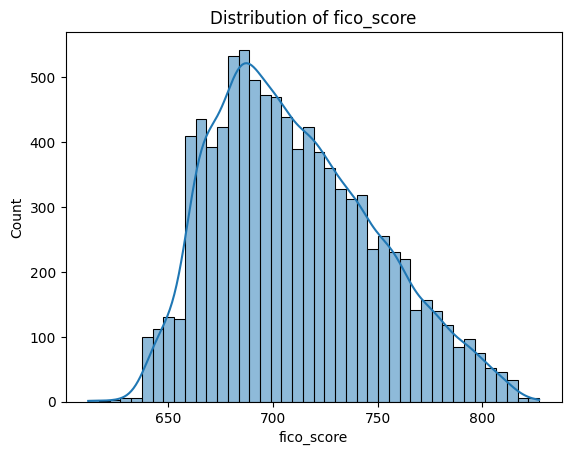

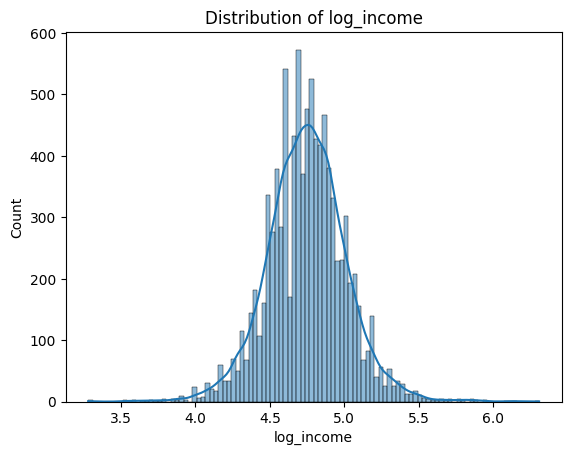

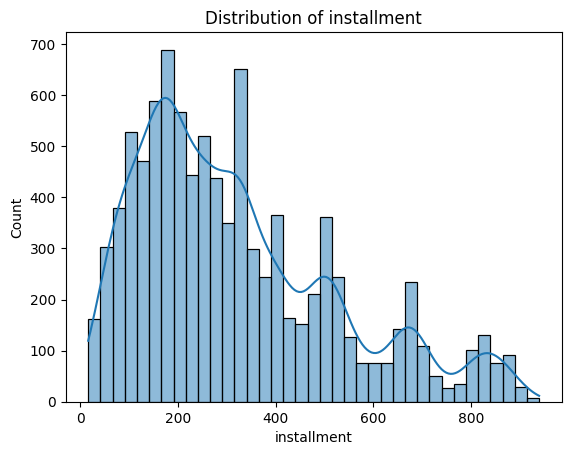

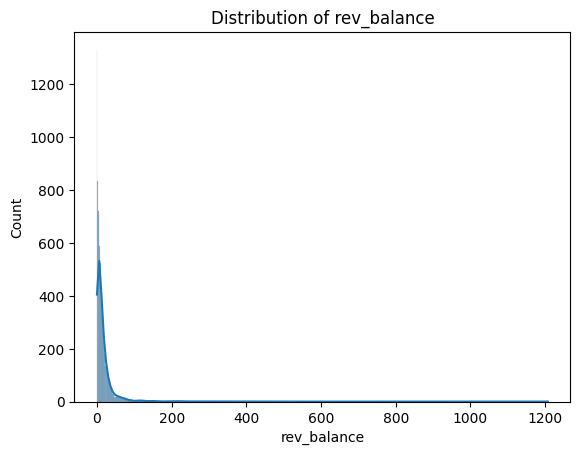

In [10]:
features = ['fico_score', 'log_income', 'installment', 'rev_balance']
for feature in features:
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

<span style="color: cyan;">

The code `df.head()` displays the first five rows of the DataFrame `df`. This method is commonly used in data analysis to quickly inspect the initial entries of a dataset. By viewing these rows, you can verify that the data has been loaded correctly, check the column names, and get an initial sense of the structure and contents of the DataFrame before performing further analysis or processing.

In [11]:
df.head()

,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,829,4.93,737,28.85,0,0
1,0,228,4.81,707,33.62,0,0
2,0,367,4.51,682,3.51,1,0
3,0,162,4.93,712,33.67,1,0
4,0,103,4.91,667,4.74,0,0


<span style="color: cyan;">

This code prepares the dataset for modeling and addresses class imbalance using the Synthetic Minority Over-sampling Technique (SMOTE). First, it separates the features (`X`) from the target variable (`y`) by dropping the `'default'` column from the DataFrame `df` and assigning it to `X`, while `y` is set to the `'default'` column itself.

Next, it creates an instance of the `SMOTE` class, which is used to generate synthetic samples for the minority class in imbalanced datasets. The `fit_resample` method is then applied to `X` and `y`, producing new feature and target arrays (`X_res` and `y_res`) with balanced class distributions.

Finally, `y_res.value_counts()` is called to display the number of samples in each class after resampling. This helps confirm that SMOTE has successfully balanced the dataset, which is important for improving the performance and fairness of classification models.

In [12]:
X            = df.drop('default', axis=1)
y            = df['default']
smote        = SMOTE()
X_res, y_res = smote.fit_resample(X, y)
y_res.value_counts()

default
0    7995
1    7995
Name: count, dtype: int64

<span style="color: cyan;">

This code snippet performs several key steps in preparing and fitting a logistic regression model using the `statsmodels` library in Python. Here's a detailed explanation of each step:

1. **Splitting the Data**:
   - `X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, _split`: This line splits the resampled feature matrix (`X_res`) and target variable (`y_res`) into training and validation sets. The `train_test_split` function from `sklearn.model_selection` is used to randomly split the data. The `test_size=0.2` parameter specifies that 20% of the data should be used for validation, while the remaining 80% is used for training. The `random_state=42` parameter ensures that the split is reproducible.

2. **Adding a Constant Term**:
   - `X_train_sm =`: This line adds a constant term (intercept) to the training feature matrix (`X_train`). The `add_constant` function from `statsmodels` is used to add a column of ones to the feature matrix, which is necessary for fitting an intercept in the logistic regression model.

3. **Defining the Logistic Regression Model**:
   - `logit_model = sm.Logit(y_train, X_train_sm, method='bfgs'`: This line defines a logistic regression model using the `Logit` class from `statsmodels`. The model is specified with the training target variable (`y_train`) and the training feature matrix with the added constant (`X_train_sm`). The `method='bfgs'` parameter specifies that the Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm should be used for optimization. The `maxiter=2000` parameter sets the maximum number of iterations for the optimization algorithm to 2000.

4. **Fitting the Model**:
   - `result = logit_model.fit(max_iter=2000)`: This line fits the logistic regression model to the training data. The `fit` method is called on the `logit_model` object, and the `max_iter=2000` parameter ensures that the optimization algorithm has sufficient iterations to converge. The result of the fitting process is stored in the `result` object, which contains various details about the fitted model.

5. **Displaying the Model Summary**:
   - This line prints a summary of the fitted logistic regression model. The `summary` method of the `result` object generates a detailed report that includes information such as the coefficients of the model, standard errors, z-values, p-values, and various goodness-of-fit statistics. This summary is useful for interpreting the results of the logistic regression analysis and understanding the significance of the predictors.

By executing this code, you can train a logistic regression model on the resampled dataset, ensuring that the model accounts for class imbalance. The model summary provides valuable insights into the relationships between the predictors and the target variable, helping you to evaluate the model's performance and interpret its coefficients.

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
X_train_sm  = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_sm, method='bfgs', maxiter=2000)
result      = logit_model.fit(max_iter=2000)
result.summary()

Optimization terminated successfully.
         Current function value: 0.654840
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                12792
Model:                          Logit   Df Residuals:                    12785
Method:                           MLE   Df Model:                            6
Date:                Sun, 27 Jul 2025   Pseudo R-squ.:                 0.05527
Time:                        12:54:32   Log-Likelihood:                -8376.7
converged:                       True   LL-Null:                       -8866.7
Covariance Type:            nonrobust   LLR p-value:                1.849e-208
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.4767      0.548     22.773      0.000      11.403      13.551
installment     0.0013      0.000     13.173      0.000       0.001       0.002
log_income     -0.9423      0.091    -10.384      0.000      -1.120      -0.764
fico_score     -0.0122      0.001    -22.492      0.000      -0.013      -0.011
rev_balance     0.0039      0.001      5.843      0.000       0.003       0.005
inquiries       0.0783      0.009      8.534      0.000       0.060       0.096
records        -0.8798      0.093     -9.470      0.000      -1.062      -0.698
===============================================================================
"""

<span style="color: cyan;">

This code performs several key steps in training and evaluating a logistic regression model using the `scikit-learn` library in Python. Here's a detailed explanation of each step:

1. **Splitting the Data**:
   - `X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2`: This line splits the resampled feature matrix (`X_res`) and target variable (`y_res`) into training and validation sets. The `train_test_split` function from `sklearn.model_selection` is used to randomly split the data. The `test_size=0.2` parameter specifies that 20% of the data should be used for validation, while the remaining 80% is used for training. The `random_state=42` parameter ensures that the split is reproducible.

2. **Defining and Training the Logistic Regression Model**:
   - `model = `: This line initializes a logistic regression model using the `LogisticRegression` class from `scikit-learn`. The `max_iter=1000` parameter sets the maximum number of iterations for the optimization algorithm to 1000, ensuring that the model has sufficient iterations to converge.
   - `model.fit(X_train,y_train`: This line fits the logistic regression model to the training data. The `fit` method is called on the `model` object, using the training feature matrix (`X_train`) and the training target variable (`y_train`). This step trains the model by finding the optimal coefficients that minimize the logistic loss function.

3. **Making Predictions**:
   - `y_pred =`: This line uses the trained logistic regression model to make predictions on the validation set. The `predict` method is called on the `model` object, using the validation feature matrix (`X_val`). The predicted labels are stored in the `y_pred` variable.

4. **Evaluating the Model**:
   - `print("Accuracy:", accuracy_score(y_val,y_pred)`: This line calculates and prints the accuracy of the model on the validation set. The `accuracy_score` function from `sklearn.metrics` is used to compute the accuracy, which is the fraction of correctly classified samples. The true labels (`y_val`) and the predicted labels (`y_pred`) are passed as arguments to the function.
   - `print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred)`: This line calculates and prints the confusion matrix for the validation set. The `confusion_matrix` function from `sklearn.metrics` is used to compute the confusion matrix, which provides a summary of the prediction results by showing the counts of true positives, true negatives, false positives, and false negatives. The true labels (`y_val`) and the predicted labels (`y_pred`) are passed as arguments to the function.

By executing this code, you can train a logistic regression model on the resampled dataset, make predictions on the validation set, and evaluate the model's performance using accuracy and the confusion matrix. These evaluation metrics provide insights into how well the model is performing and help identify areas for improvement.

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))

Accuracy: 0.6053783614759225
Confusion Matrix:
 [[ 908  690]
 [ 572 1028]]


<span style="color: cyan;">

This code performs several key steps in preprocessing the data, training a logistic regression model, and evaluating its performance using the `scikit-learn` library in Python. Here's a detailed explanation of each step:

1. **Standardizing the Data**:
   - `scaler =`: This line initializes an instance of the `StandardScaler` class from `scikit-learn`. The `StandardScaler` standardizes features by removing the mean and scaling to unit variance, which is a common preprocessing step for many machine learning algorithms.
   - `X_train_scaled =`: This line fits the `StandardScaler` to the training data (`X_train`) and then transforms it. The `fit_transform` method computes the mean and standard deviation of the training data and scales it accordingly.
   - `X_val_scaled =`: This line transforms the validation data (`X_val`) using the same scaling parameters computed from the training data. The `transform` method scales the validation data based on the mean and standard deviation of the training data, ensuring that both datasets are standardized in the same way.

2. **Training the Logistic Regression Model**:
   - `model =`: This line initializes a logistic regression model using the `LogisticRegression` class from `scikit-learn`. The `max_iter=1000` parameter sets the maximum number of iterations for the optimization algorithm to 1000, ensuring that the model has sufficient iterations to converge.
   - `model.fit(X_train_scaled,`: This line fits the logistic regression model to the standardized training data (`X_train_scaled`) and the training target variable (`y_train`). The `fit` method trains the model by finding the optimal coefficients that minimize the logistic loss function.

3. **Making Predictions**:
   - `y_pred =`: This line uses the trained logistic regression model to make predictions on the standardized validation data (`X_val_scaled`). The `predict` method is called on the `model` object, and the predicted labels are stored in the `y_pred` variable.

4. **Evaluating the Model**:
   - `print("Accuracy:", accuracy_score(y_val,`: This line calculates and prints the accuracy of the model on the validation set. The `accuracy_score` function from `sklearn.metrics` is used to compute the accuracy, which is the fraction of correctly classified samples. The true labels (`y_val`) and the predicted labels (`y_pred`) are passed as arguments to the function.
   - `print("Confusion Matrix:\n", confusion_matrix(y_val,`: This line calculates and prints the confusion matrix for the validation set. The `confusion_matrix` function from `sklearn.metrics` is used to compute the confusion matrix, which provides a summary of the prediction results by showing the counts of true positives, true negatives, false positives, and false negatives. The true labels (`y_val`) and the predicted labels (`y_pred`) are passed as arguments to the function.

5. **Displaying the First Few Rows of the DataFrame**:
   - This line prints the first six rows of the DataFrame (`df`). The `head` method is used to quickly inspect the initial entries of the DataFrame, providing a snapshot of the data structure and content.

By executing this code, you can preprocess the data by standardizing it, train a logistic regression model on the standardized training data, make predictions on the standardized validation data, and evaluate the model's performance using accuracy and the confusion matrix. These evaluation metrics provide insights into how well the model is performing and help identify areas for improvement. Additionally, displaying the first few rows of the DataFrame helps verify that the data has been loaded correctly and provides an initial sense of the dataset.

In [15]:
scaler         = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
model          = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)
y_pred         = model.predict(X_val_scaled)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
df.head(5)

Accuracy: 0.6056910569105691
Confusion Matrix:
 [[ 908  690]
 [ 571 1029]]


,default,installment,log_income,fico_score,rev_balance,inquiries,records
0,0,829,4.93,737,28.85,0,0
1,0,228,4.81,707,33.62,0,0
2,0,367,4.51,682,3.51,1,0
3,0,162,4.93,712,33.67,1,0
4,0,103,4.91,667,4.74,0,0
